In [30]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [38]:
#tf.config.list_physical_devices('GPU')

In [4]:
from tensorflow.keras.layers import BatchNormalization,Dense,LSTM

In [6]:
#pickle load
X_file = open('feature_data', 'rb')
X = pickle.load(X_file)   
X_file.close()

y_file = open('label_data', 'rb')
y = pickle.load(y_file)   
y_file.close()

In [ ]:
# #Rading Dataset
# path = "/content/drive/MyDrive/Colab Notebooks/Dataset_clean.csv"
# dataset = pd.read_csv(path)

In [ ]:
# dataset.head()

In [ ]:
# X = dataset.iloc[:,:-1]
# y = dataset.iloc[:,-1]

In [ ]:
# #changing dtypes of  features columns ("X")
# X = X.astype("float64")

In [7]:
X.shape,y.shape

((2572635, 78), (2572635,))

In [8]:
12.5//2

6.0

In [ ]:
# # RobustScaler is used to preserve outliers in the data.
# scaler = RobustScaler()
# scaler.fit(X)

# X = scaler.transform(X)

In [ ]:
# X = X.to_numpy()

In [9]:
#RESHAPING THE DATA
X = X.reshape(X.shape[0],X.shape[1] //2 ,2)

In [10]:
# b=np.array([[1,2,3,4,5,6],[15,16,17,18,19,20]])
# b.reshape(b.shape[0],b.shape[1]//2,2)


In [11]:
# X[0]

In [12]:
# del dataset

LABEL ENCODING

In [13]:
LE = LabelEncoder()

LE.fit(y)
y = LE.transform(y)

In [14]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

TRAINING THE MODEL

In [15]:
# from imblearn.over_sampling import SMOTE
# X_resample,y_resample=SMOTE().fit_resample(X,y)

In [16]:
# del X
# del y

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2058108, 39, 2), (514527, 39, 2), (2058108,), (514527,))

In [18]:
unique, counts = np.unique(y_test, return_counts=True)

In [19]:
unique , counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([34218, 34408, 34360, 34007, 33967, 34293, 34745, 34467, 34338,
        34227, 34377, 34474, 34143, 34314, 34189]))

In [20]:
model = tf.keras.models.Sequential()
model.add(
    LSTM(
        16,activation="relu",
         input_shape=[X.shape[1],2],
         return_sequences = True,
    ))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
model.add(BatchNormalization())
model.add(LSTM(16))
model.add(BatchNormalization())
model.add(Dense(15,activation = "softmax"))

In [22]:
from tensorflow.keras.optimizers import Adam

In [23]:
#compile the model
opt=Adam(clipnorm=1)
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [24]:
# with tf.device('GPU:0'):
#     model.fit(X_train,y_train,epochs=1)
#     model.evaluate(X_test, y_test, verbose=2)

In [35]:
var = model.fit(X_train,y_train,epochs=5)


Epoch 1/5
2058108/2058108 [==============================] - 2030s 986us/sample - loss: 0.1214 - acc: 0.9417
Epoch 2/5
2058108/2058108 [==============================] - 2004s 974us/sample - loss: 0.1177 - acc: 0.9437
Epoch 3/5
2058108/2058108 [==============================] - 2228s 1ms/sample - loss: 0.1161 - acc: 0.9443
Epoch 4/5
2058108/2058108 [==============================] - 2190s 1ms/sample - loss: 0.1146 - acc: 0.9448
Epoch 5/5
2058108/2058108 [==============================] - 1873s 910us/sample - loss: 0.1129 - acc: 0.9455


In [26]:
model.fit(X_train,y_train,epochs=5)


Epoch 1/5
2058108/2058108 [==============================] - 1949s 947us/sample - loss: 0.2629 - acc: 0.8977
Epoch 2/5
2058108/2058108 [==============================] - 1971s 958us/sample - loss: 0.1625 - acc: 0.9272
Epoch 3/5
2058108/2058108 [==============================] - 1982s 963us/sample - loss: 0.1355 - acc: 0.9361
Epoch 4/5
2058108/2058108 [==============================] - 1974s 959us/sample - loss: 0.1274 - acc: 0.9391
Epoch 5/5
2058108/2058108 [==============================] - 1880s 913us/sample - loss: 0.1215 - acc: 0.9409


In [27]:
# Evaluating model accuracy.
model.evaluate(X_test, y_test, verbose=2)

514527/514527 - 109s - loss: 0.4033 - acc: 0.8705


[0.40330716389329246, 0.8704674]

In [28]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

In [29]:
# Saving the model.

model.save('IDS_model_lstm.h5')

#### Plotting accuracy and loss function

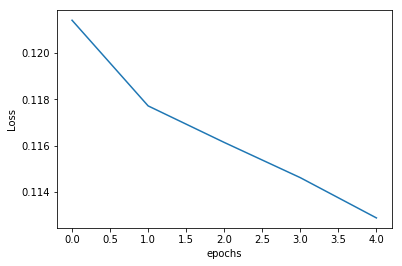

<Figure size 432x288 with 0 Axes>

In [36]:
# Loss graph
plt.plot(var.history['loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
plt.savefig('lstm_loss.png')

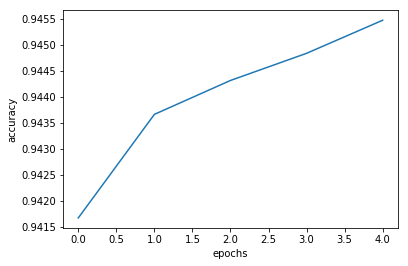

<Figure size 432x288 with 0 Axes>

In [37]:
# accuracy graph
plt.plot(var.history['acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.savefig('lstm_accuracy.png')